In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [37]:
outputs = {}
outputs['OR'] = [0, 1, 1, 1]
outputs['NOR'] = [1, 0, 0, 0]
outputs['NAND'] = [1, 1, 1, 0]
outputs['AND'] = [0, 0, 0, 1]
#outputs['XNOR'] = [1, 0, 0, 1]
#outputs['XOR'] = [0, 1, 1, 0]

epochs = 500
lrate = 0.01

In [38]:
indata = np.array([(0,0,1), (0,1,1), (1,0,1), (1,1,1)])
# the extra 1 is for bias multiplier -- bias is in-built in weight matrix (no extra variable)

In [39]:
def predict(weights, indata):
    return np.dot(indata, weights)

def activation(y, thresh=0.5):
    if y<thresh: 
        return 0
    else: 
        return 1

In [49]:
for func_type in outputs.keys():

    w1 = np.random.rand(indata.shape[1], 1) # extra one value to represent bias
    wcopy = np.copy(w1)
    outdata = outputs[func_type]

    # learning loop
    for epindx in range(epochs):
        for i in range(len(indata)):
            predicted = activation(predict(w1, indata[i]))

            # delta rule
            err = outdata[i] - predicted 

            w_delta = (lrate * err * indata[i]).reshape(w1.shape)
            w1 += w_delta


    print (f"\n\nFunction : {func_type}")
    print ("predicted\tactual")
    for i in range(len(indata)):
        print (f"{activation(predict(w1, indata[i]))}\t\t{outdata[i]}")
    print (f"weights = {w1}")



Function : OR
predicted	actual
0		0
1		1
1		1
1		1
weights = [[0.34258118]
 [0.22348987]
 [0.28945964]]


Function : NOR
predicted	actual
1		1
0		0
0		0
0		0
weights = [[-0.0715328 ]
 [-0.00435504]
 [ 0.50296521]]


Function : NAND
predicted	actual
1		1
1		1
1		1
0		0
weights = [[-0.05659114]
 [-0.00182081]
 [ 0.55679394]]


Function : AND
predicted	actual
0		0
0		0
0		0
1		1
weights = [[0.42733248]
 [0.25106122]
 [0.07080861]]


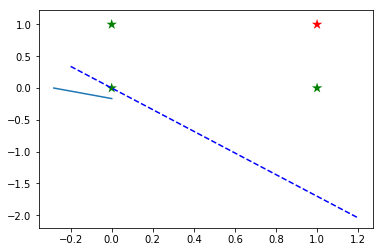

In [53]:
# from https://zahidhasan.github.io/2017-09-10-perceptron/
b = w1[2]
a = [0,-b/w1[1]]
c = [-b/w1[0],0]


# britt anderson method - perpendicular line to the weight vector
xvals = np.linspace(-0.2,1.2,1000)
slope = -1 / (w1[1] / w1[0])
yvals = slope * xvals # + w1[2]

# common - calculate the points and colors
points = indata[:,:-1]
xp = points[:,0].tolist()
yp = points[:,1].tolist()
cdict = {0:'green', 1:'red'}
colors = [cdict[x] for x in outdata]

# finally, plot them all
plt.plot(xvals, yvals, linestyle='--', color='blue')
plt.scatter(xp, yp, marker = '*', lw=0, color = colors, s=120)
plt.plot(a,c)

In [50]:
w1.shape

(3, 1)

In [51]:
indata[1].shape

(3,)